<a href="https://colab.research.google.com/github/pskaranth/covid19_analysis/blob/main/Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data and Task

**Data**

Data was taken from Johns Hopkins github repo and the project was done in April 2020

**Task**

Analysis of Covid 19 data and predicting cases using Linear, Polynomial and SVR regression models

In [1]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


Considering only confirmed cases from Johns Hopkins github repo

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19


In [ ]:
confirmed_df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

Checking the data for china

In [ ]:
confirmed_df_ch = confirmed_df[confirmed_df['Country/Region']=='China']
confirmed_df_ch.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,411,413,414,414,418,418,422,426,428,428,429,435,435,436,437,442,452,456,469,480,491,504,522,537,558,561,566,569,573,577,577,580,580,582,584,585,586,587,587,588
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,577,578,578,578,578,578,578,579,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,299,303,313,313,318,322,328,331,337,338,340,343,345,345,349,350,350,350,351,351
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,102,119,120,124,124,125,127,127,127,129,133,133,133,133,134,134,134,136,136,136,136,136,136,136,138,138,138,138,138,138,138,138,139,139,139


Checking data for any null values

In [ ]:
confirmed_df[confirmed_df.isnull().any(axis=1)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,4,6,6,6,7
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,4,5,8,8
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4


In [ ]:
confirmed_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/4/20              int64
4/5/20              int64
4/6/20              int64
4/7/20              int64
4/8/20              int64
Length: 82, dtype: object

In [ ]:
confirmed_df['Country/Region'].value_counts() #Based on the number of Provinces

China             33
Canada            15
United Kingdom    11
France            11
Australia          8
                  ..
Georgia            1
Laos               1
Serbia             1
Belarus            1
Barbados           1
Name: Country/Region, Length: 184, dtype: int64

Number of days in total from Jan 22:  78
Total cases in Germany after data prep :  [0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27, 46, 48, 79, 130, 159, 196, 262, 482, 670, 799, 1040, 1176, 1457, 1908, 2078, 3675, 4585, 5795, 7272, 9257, 12327, 15320, 19848, 22213, 24873, 29056, 32986, 37323, 43938, 50871, 57695, 62095, 66885, 71808, 77872, 84794, 91159, 96092, 100123, 103374, 107663, 113296]
Converting column header date into a list :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


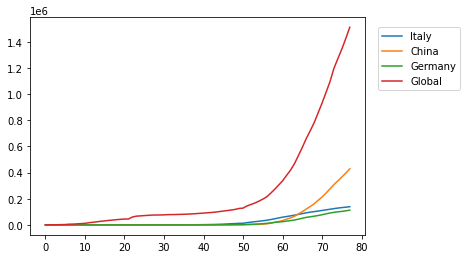

In [ ]:
germany_tot_cases = []
us_tot_cases = []
china_tot_cases =[]
italy_tot_cases=[]
date_list = []
global_cases = []

dates_dt = confirmed_df.loc[:, confirmed_df.columns[4]:confirmed_df.columns[-1]]
print('Number of days in total from Jan 22: ',len(dates_dt.columns))

for i in dates_dt.columns:
   germany = confirmed_df[confirmed_df['Country/Region']=='Germany']
   germany_daily_case = germany[i].sum()
   germany_tot_cases.append(germany_daily_case)

   us = confirmed_df[confirmed_df['Country/Region']=='US']
   us_daily_case = us[i].sum()
   us_tot_cases.append(us_daily_case)

   china = confirmed_df[confirmed_df['Country/Region']=='China']
   china_daily_case = us[i].sum()
   china_tot_cases.append(us_daily_case)

   italy = confirmed_df[confirmed_df['Country/Region']=='Italy']
   italy_daily_case = italy[i].sum()
   italy_tot_cases.append(italy_daily_case)

   global_daily_case = confirmed_df[i].sum()
   global_cases.append(global_daily_case)

for j in range(len(dates_dt.columns)):
  date_list.append(j)


print('Total cases in Germany after data prep : ',germany_tot_cases)
print('Converting column header date into a list : ',date_list)

#Plotting the graphs of number of cases v/s number of days
fig = plt.figure()
plt.plot(date_list,italy_tot_cases,label='Italy')
plt.plot(date_list,china_tot_cases,label='China')
plt.plot(date_list,germany_tot_cases,label='Germany')
plt.plot(date_list,global_cases,label='Global')

plt.legend(bbox_to_anchor=(1.01, 1), loc=2,  borderaxespad=1.)

Converting dates, Germany cases, US and Global cases respectively to numpy array 

In [ ]:
dt_array = np.array(date_list).reshape(-1,1)
ge_array = np.array(germany_tot_cases).reshape(-1,1)
us_array = np.array(us_tot_cases).reshape(-1,1)
china_array = np.array(china_tot_cases).reshape(-1,1)
glb_array = np.array(global_cases).reshape(-1,1)

In [ ]:
dt_array[10] #11th day

array([10])

### Train and test split
Performing train and test split so that data is available for testing and predicting.This is done for Germany, United States and Global cases respectively.

In [ ]:
X_train_ger, X_test_ger, y_train_ger, y_test_ger = train_test_split(dt_array, ge_array, test_size=0.3,shuffle=False) 
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(dt_array, us_array, test_size=0.3,shuffle=False) 
X_train_china, X_test_china, y_train_china, y_test_china = train_test_split(dt_array, china_array, test_size=0.3,shuffle=False) 
X_train_glb, X_test_glb, y_train_glb, y_test_glb = train_test_split(dt_array, glb_array, test_size=0.3,shuffle=False) 

### Using Linear Regression Algorithm

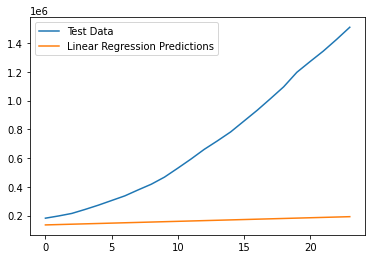

In [ ]:
lin_model = LinearRegression(normalize=True, fit_intercept=False)
lin_model.fit(X_train_glb, y_train_glb)
lin_glb_pred = lin_model.predict(X_test_glb)
plt.plot(y_test_glb)
plt.plot(lin_glb_pred)
plt.legend(['Test Data', 'Linear Regression Predictions'])

Above algorithm does not seem to fit the data well. So let's try Polynomial regression and try to fit the data


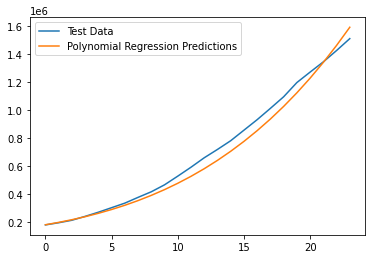

In [ ]:
#plotting Global cases predicted v/s confirmed cases
pf = PolynomialFeatures(degree=5)
glb_X_train_confirmed = pf.fit_transform(X_train_glb)
glb_X_test_confirmed = pf.fit_transform(X_test_glb)
# poly_future_forcast = pf.fit_transform(future_forcast)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(glb_X_train_confirmed, y_train_glb)
linear_glb_pred = linear_model.predict(glb_X_test_confirmed)
plt.plot(y_test_glb)
plt.plot(linear_glb_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

### Support Vector Regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


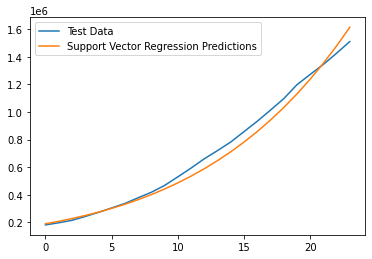

In [ ]:
svr_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svr_confirmed.fit(X_train_glb, y_train_glb)
svr_test_pred = svr_confirmed.predict(X_test_glb)

plt.plot(y_test_glb)
plt.plot(svr_test_pred)
plt.legend(['Test Data', 'Support Vector Regression Predictions'])

In [ ]:
svr_confirmed.predict([[78]]) # 4/9/2020

array([1761779.32059566])

Below code is using Linear regression for fitting Germany cases.

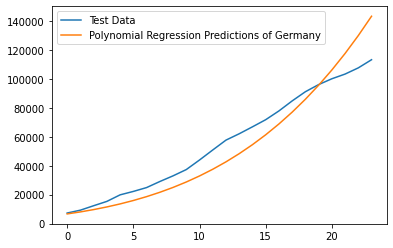

In [ ]:
pf = PolynomialFeatures(degree=5)
poly_X_train_confirmed = pf.fit_transform(X_train_ger)
poly_X_test_confirmed = pf.fit_transform(X_test_ger)


linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_ger)
test_ln_ger_pred = linear_model.predict(poly_X_test_confirmed)
plt.plot(y_test_ger)
plt.plot(test_ln_ger_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions of Germany'])

Below code is using Linear regression for fitting US cases.

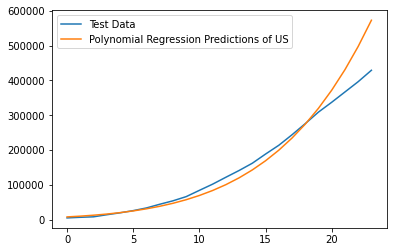

In [ ]:
pf = PolynomialFeatures(degree=7)
poly_X_train_confirmed = pf.fit_transform(X_train_us)
poly_X_test_confirmed = pf.fit_transform(X_test_us)


linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_ger)
test_ln_us_pred = linear_model.predict(poly_X_test_confirmed)
plt.plot(y_test_us)
plt.plot(test_ln_us_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions of US'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


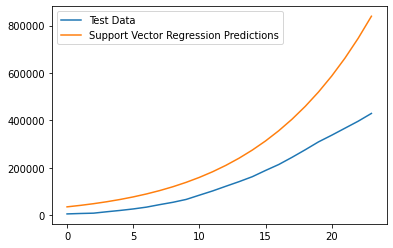

In [ ]:
svr_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=9, C=0.1)
svr_confirmed.fit(X_train_china, y_train_china)
svr_test_pred = svr_confirmed.predict(X_test_china)

plt.plot(y_test_china)
plt.plot(svr_test_pred)
plt.legend(['Test Data', 'Support Vector Regression Predictions'])

Parameters varies from country to country. It also depends on various amount of containment measures such as school closures, business lockdown and social distancing implemented by the country. Further research can be done to analyse if containment measure has helped to reduce the number of infections.There are epidemic models such as SIR which can be used to analyse the infection/recovery curve. (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)